# Ermittlung der Fahrqualität von Fahrradwegen mit Fuzzy Logik

## Einleitung

Mit Fuzzy Logik soll die Oberflächenqualität von Fahrradwegen eingeordnet werden nach dem Kriterium der Fahrqualität. Hierfür werden unterschiedliche Regeln und Merkmale der erfassten Daten untersucht. Im Gegensatz zu klassischen Logik gibt es nicht nur Wahrheitswerte 0 für falsch oder 1 für wahr einee Aussage, sondern es gibt Wahrheitswerte zwischen 0 und 1 mit einem Wahrheitsgehaltwert $\mu$. Damit ist es möglich eine stetige Menge zu beschreiben. Diese Menge siehe Def. 1 wird als Fuzzy-Menge definiert. Dabei wird jeden Element $x$ Teil der Grundmenge $G$ einen Wahrheitsgehaltwert $\mu$ zugeordnet. Der Vorteil bei der Verwendung von Fuzzy Logik gegenüber Clustering Verfahren wie KMeans ist es menschliches Kausalwissen oder Verhaltensweisen zu mathematisieren. Ein Eingangswert $x$ kann mit einem Zugehörigkeitsgrad $\mu$ einem linguistischen Wert $LW$ zugeordnet werden.

$F:= \lbrace (x,\mu(x)) \: \vert \: x \in G$ und $\mu(x) \in [0,1] \rbrace$
<div style="text-align: right"><i>(1)</i></div>

## Versuchsbeschreibung

Für die Einordnung der Daten in Klassen werden Regeln benötigt. Diese werden dann in eine mathematische Gleichung umgewandelt. Die Frage die experimentell zu beantworten gilt ist, welche Regeln sind sinnvoll. Die Anzahl der Repräsentanten für jede Klasse sollte ungefähr gleich sein. Um später ein einseitiges Lernen mit Faltungsnetzen zu vermeiden. Als Merkmal wird die Standardabweichung der Z-Achsen Beschleunigung $a$ und die Geschwindigkeit untersucht. 

Die Hypothese ist das die Geschwindigkeit als Merkmal relevant ist, weil bei einer steigenden Geschwindigkeit auch die Bewegungsunschärfe zunimmt. Allerdings erhöht eine starke Erschütterung oder eine lange Belichtungszeit auch die unschärfer der Bildaufnahme. In diesem Versuchen wird auch untersucht ob eine Unterteilung der Daten anhand der Geschwindigkeit zu einem besseren Ergebnis im Sinne der Genauigkeit bei der Klassifizierung führt.
In den Versuchen wird die Bibliothek [Scikit Fuzzy (skfuzzy)](https://pythonhosted.org/scikit-fuzzy/) genutzt.

### Fuzzy System

Mit einer nicht nichtlinearen Funktion siehe G. 2 kann ein Fuzzy System beschrieben werden. Dabei sind die Eingangsgrößen als $x_i$ und die Ausgangsgrößen als $y_i$ definiert. Ziel ist es sprachliche Regeln wie die folgende Implikation in eine mathematische Gleichung umzuformen. Wenn die Erschütterung $x$ sehr hoch ist und die Geschwindigkeit $v$ niedrig ist, dann ist die Fahrqualität $y$ sehr schlecht. 


$y_{res} = f(x_1, ...,x_n)$
<div style="text-align: right"><i>Fuzzy System als Funktion  (2)</i></div>

Ein Fuzzy System besteht aus mehreren Funktionen. Diese werden nun nach der Reihenfolge ihrer Ausführung beschrieben. 
Bei der Fuzzifizierung siehe G. 3 werden zu den Eingangsgrößen $x_i$ die Zugehörigkeitswerte bestimmt. Dabei gibt $LW_{i,j}$ die linguistischen Werte der Eingangsgröße $x_i$ an mit $j=1, ...,q$ und $q$ steht für die Anzahl der linguistischen Werte.

$\mu_{LW_{i,j}}(x_i)$
<div style="text-align: right"><i>Fuzzifizierung (3)</i></div>

Die Aggregation siehe G. 4 ist die Ausführung der "und" Verknüpfung der Implikation. Die Funktion $min\lbrace \mu_a,\mu_b \rbrace$ ist die Fuzzy-Und-Verknüpung und gibt alle Werte zurück bei welchem sich der Wahrheitswert $\mu$ überschneidet. Als Fuzzy-Oder-Verknüpfung wird die Funktion $max\lbrace\mu_a,\mu_b\rbrace$ definiert. Diese gibt alle Wahrheitswerte $\mu$ zurück ähnlich dem oder in der booleschen Logik aber mit stetigen Werten. 

$\mu_{agg,k}(x_i, ...,x_n)=min\lbrace \mu_{LW_{1,i}}(x_1),...,\mu_{LW_{n,p}}(x_n)\rbrace$ <br />
$k = 1, ..., m$
<div style="text-align: right"><i>Aggregation (4)</i></div>

Dann definiert G. 5 die Schlussfolgerung der Implikation. Die Akkumulation siehe G. 6 beschreibt die Überlagerung der Ergebnisse der Implikation.  

$\mu_k(x_1, ...,x_n,y)=min\lbrace\mu_{agg,k}(x_1,...,x_n),\mu_{LW_{k}}(y)\rbrace$ <br />
$k = 1, ..., m$
<div style="text-align: right"><i>Implikation (5)</i></div>

$\mu_{res}(x_1, ...,x_n,y)=max\lbrace\mu_1(x_1,...,x_n,y),...,\mu_m(x_1,...,x_n,y)\rbrace$ <br />
<div style="text-align: right"><i>Akkumulation (6)</i></div>

Als letztes wird die Defuzzifizierung ausgeführt siehe G.7. Dabei wird die Ausgangsgröße bestimmt. Es gibt für jede Funktion unterschiedliche Rechenoperationen. Für die folgenden Versuche werden wie in den G. 4 bis 6 die beschriebenen Operationen auf der rechten Seite der Gleichungen genutzt. Für die Defuzzierung wird die MOM angewendet. Dies ist der Wert mit dem maximalen Zugehörigkeitswert \mu.  

$y_{res}=\frac{\int y * \mu_{res}(x_1, ..., x_n,y)\:dy}{\int \mu_{res}(x_1, ..., x_n,y)\:dy}$
<div style="text-align: right"><i>Defuzzifizierung (7)</i></div>


### Versuch 1: Referenzstrecken

Um die Standardabweichung der Z-Achsen Beschleunigung zu unterteilen in Abstufungen werden sinnvolle Grenzwerte benötigt. Als erste Überlegung könnten die Dateien gleichmäßig unterteilt werden indem die Daten anhand der Erschütterung sortiert werden.  Der Nachteil ist, dass die Werte nicht gleichmäßig verteilt sind (siehe Abb. 1). Die Werte auf das Intervall [0,1] zu normieren und dann einen Prozentwert als Unterteilung zu wählen ist auch nicht sinnvoll. Der Wertebereich ist nämlich nicht gleichmäßig verteilt.

<img src="../daten/abbildungen/histogrammStandardabweichung.png" alt="Histogramm der Z-Achsen Standardabweichung Beschleunigung" />
Abbildung 1: Histogramm der Z-Achsen Beschleunigung Standardabweichung für die Datensätze 37 bis 42

Die Idee ist mit Referenzstecken für eine leichte und hohe Erschütterung eine Unterteilung vorzunehmen. Dabei können für die Zwischenstufen von leicht bis zu einer hohen Erschütterung die Mittelwerte genutzt werden. Für die Referenzstrecke wird ein Abschnitt ausgewählt, welcher von der Unebenheit möglichst gleichbleibt. Der Mittelwert von der Z-Achsen Standardabweichung wird dann als Maximalwert $\mu$ gewählt für die Zuordnungsfunktion des Fuzzy Systems.  

Es werden in diesem Versuch also zwei Referenzstrecken gesucht, eine mit leichter und eine mit hoher Erschütterung.  

### Ergebnis Versuch 1

Die beiden untersuchten Referenzstrecken gehören zu den Datensatz 38. Wie auf Abb. 2 zu sehen ist der Radweg asphaltiert und weist nur geringe Unebenheiten auf. Deshalb eignet sich dieser gut als Referenz für einen Weg mit möglichst geringer Erschütterung. Der Mittelwert der Standardabweichung der Z-Achsen Beschleunigung beträgt $\approx 1.5 m/s^2$.

<img src="../daten/abbildungen/leichteErschuetterungReferenzstrecke.png" alt="Radweg aus Asphalt mit wenigen Unebenheiten"/>

Abbildung 2: Radweg aus Asphalt mit wenigen Unebenheiten

Dagegen ist auf Abb. 3 als Beispiel ein Kiesweg mit vermutlich hoher Erschütterung zu sehen, wenn dieser mit einem Fahrrad befahren wird. Auf OpenStreetMap hat der Weg das tag unbefestigt mit einer Qualität von 2. Für die unterschiedliche Einstufung der Qualität von Oberflächen siehe die [Wiki](https://wiki.openstreetmap.org/wiki/Proposed_features/Surface_Quality) Website von OpenStreetMap. Laut der Definition müsste der unbefestigte Schotter Weg eigentlich eine schlechtere Qualitätseinstufung haben. Bei diesem Beispiel beträgt der Mittelwert der Z-Achsen Standardabweichung $\approx 7,3m/s^2$.

<img src="../daten/abbildungen/schwereErschuetterungReferenzstrecke.png" alt="Radweg aus groben Kies" />

Abbildung 3: Radweg aus groben Kies 

### Versuch 2: Regelbasierte Klassifizierung der Daten durch die gemessene Erschütterung

In diesem Versuch werden die Daten klassifiziert anhand der gemessenen Standardabweichung der Z-Achsen Beschleunigung.
Hierbei wird für den Schritt der Fuzzifizierung die Ergebnisse aus den letzten Versuch genutzt. Für das Fuzzy System wird die Regelbasis aus Tab 1 genutzt. Dabei orientieren sich die linguistische Werte $LW$ der Ausgangsgröße $y$ an den Key [smoothness](https://wiki.openstreetmap.org/wiki/Key:smoothness). Die Gleichmäßigkeit der Oberfläche wird dabei in 8 Stufen unterschieden von hervorragend bis nicht passierbar. Bei diesem Versuch ist die Anzahl der unterschiedlichen Klassen auf die Hälfte reduziert. Die Hypothese ist, dass dadurch das System und die Klassifizierung vereinfacht werden können.    

|  | sehr leichte Erschütterung | leichte  Erschütterung | hohe Erschütterung | sehr hohe Erschütterung |
| --- | --- | --- | --- | --- |
| <b>Fahrqualität | sehr gut | gut | schlecht | sehr schlecht |
Tabelle 1: Regelbasis für Versuch 2

### Ergebnis Versuch 2

Auf Abb. 4 ist zu sehen wie die Eingangsgrößen auf linguistische Werte $LW$ abgebildet werden. Dabei wird eine Trapezfunktion für die Werte sehr gut und sehr schlecht genutzt. Um alle Werte kleiner und größer als die Mittelwerte der Standardabweichung der Z-Achsen Beschleunigung von den Referenzstrecken zuzuordnen. Für die Erschütterungswerte gut und schlecht wurden Dreiecksfunktionen genutzt. Die Eingangsgrößen haben eine Genauigkeit von 3 Kommastellen.

<img src="../daten/abbildungen/fuzzifizierungVersuch2.png" alt="Versuch 2 fuzzifizierung" />
Abbildung 4: Fuzzifizierung mit 4 unterschiedlichen Erschütterungs Abstufungen

In der Abb. 5 sind die Ausgangsgrößen des Fuzzy Systems definiert. Als Beispiel wurde für die Eingangsgröße die Standardabweichung der Z-Achsen Beschleunigung von $a=3m/s^2$ gewählt. Auf der Abb. 6 ist zu sehen, dass der Eingangswert zu der Klasse 1 zugeordnet wurde.

<img src="../daten/abbildungen/fahrqualitaetVersuch2.png" alt="Versuch 2 Fahrqualität" />
Abbildung 5: Gleichmäßigkeit bzw. Fahrqualität als Ausgangsgrößen des Fuzzy Systems 

<img src="../daten/abbildungen/defuzzifizierungValue3_Versuch2.png" alt="Versuch 2 Defuzzifizierung mit Standardabweichung der Z-Achsen Beschleunigung von 3m/s^2" />
Abbildung 6: Defuzzifizierung mit der gegebenen Eingangsgröße von $a=3m/s^2$ der Standardabweichung$

In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas 
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid

In [29]:
featuresDf = pandas.read_csv(filepath_or_buffer="../daten/merkmale_datensatz_37_bis_42/merkmale.csv")

### Versuch 1

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Standardabweichung Z-Achse Beschleunigung in $m/s^2$')

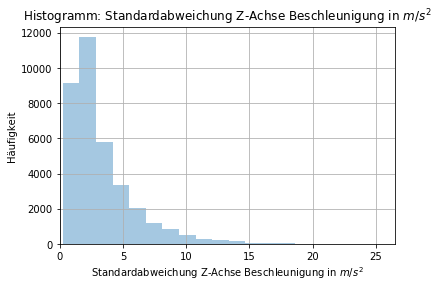

In [3]:
plt.title("Histogramm: Standardabweichung Z-Achse Beschleunigung in $m/s^2$")
sns.distplot(featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'], bins=20, kde=False)
plt.xlim(0,featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'].max())
plt.grid()
plt.ylabel('Häufigkeit')
plt.xlabel('Standardabweichung Z-Achse Beschleunigung in $m/s^2$')
#plt.savefig("histogrammStandardabweichung")

In [5]:
# Lade Bilder in eine Liste
images = []
# Hier können die Datensätze ausgewählt werden
datasets = ['38']
# Die Pfade zu den Ordnern in welchem sich die Bilder befinden
paths = []

In [6]:
for dataset in datasets: # Für jeden Datensatz merke Pfad
    paths.append("C:/Users/morro/Documents/datenRoh/" + dataset + "/zugeschnitten/")
for path in paths: # Für jeden Pfad hole die Namen der Ordner
    folders = os.listdir(path)
    folders = sorted(folders, key=int) #sortiert die Reihenfolge de Ordner aufsteifend
    for folder in folders: # Aus der Liste der Ordner wird ein Ordner ausgewählt
        filesPath = path + folder + "/"
        files = os.listdir(filesPath)
        for name in files: # Ein Dateiname aus diesem Ordner
            if "jpg" not in name:
                continue
            images.append(cv2.imread(filesPath + name)) # Bild wird gelesen

In [7]:
# Daten mit vermutlich hoher Erschütterung
startIndex = 17712
stopIndex = 17978

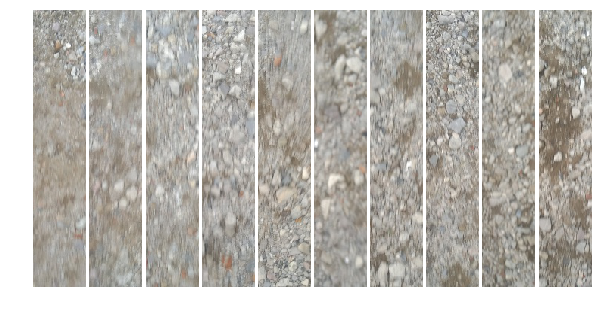

In [8]:
# Plot Beispiel Bilder
fig = plt.figure(1, figsize=(10,10))
# Anzahl der Bilder >= 10
imageToShow = 10
# Start Index des ersten Bildes
grid = ImageGrid(fig, 111, nrows_ncols=(int(imageToShow/10), 10), axes_pad=0.05)
for i, img in enumerate(images[startIndex: startIndex + imageToShow]):
    ax = grid[i]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
plt.savefig("schwereErschütterungReferenzstrecke.png")

In [11]:
i = startIndex
counter = 0
accZSum = 0
while i <= stopIndex:
    accZ = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    print(accZ)
    accZSum = accZSum + accZ
    i = i + 1
    counter = counter + 1

6.69653
8.2377
7.50788
10.27772
5.74694
7.22992
6.1292800000000005
4.70868
4.82619
4.26116
3.6432599999999997
5.19342
5.48682
5.3629
3.7335300000000005
8.48278
6.08752
4.87249
3.88058
4.37962
4.00087
5.52656
3.7510199999999996
3.4189
4.09006
4.27043
4.02936
5.935569999999999
6.5666199999999995
5.05002
7.37563
5.89575
6.856439999999999
6.1187
7.957160000000001
7.20688
9.17463
8.00581
8.72167
6.85615
5.44844
9.92345
9.57052
8.37717
7.1323
7.599289999999999
7.58598
11.79503
9.95098
8.668439999999999
8.08859
5.18703
6.85266
6.89785
8.66196
9.43087
10.98333
7.3592
13.54951
6.44722
5.799919999999999
6.33435
5.78541
7.33005
6.8638699999999995
10.27252
9.11317
8.51844
8.94674
16.08015
7.5091399999999995
6.84443
6.26474
8.63232
9.05551
9.08606
8.96439
7.19295
7.273280000000001
7.9062399999999995
9.14035
7.28291
6.35884
7.11522
7.24345
6.41296
4.94032
6.704960000000001
4.8486199999999995
4.3560099999999995
3.97626
3.43486
5.48729
6.50279
6.1676
5.99233
8.21102
9.2493
8.290280000000001
6.58245
5.

In [12]:
counter

267

In [13]:
accZSum / counter

7.29199921348315

In [8]:
# Daten mit leichter Erschütterung
startIndex = 8500
stopIndex = 9350
i = startIndex
counter = 0
accZSum = 0
while i <= stopIndex:
    accZ = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    print(accZ)
    accZSum = accZSum + accZ
    i = i + 1
    counter = counter + 1

1.2724600000000001
1.06071
1.25678
1.12558
1.3599299999999999
2.8359900000000002
1.26829
1.8591900000000001
1.3603299999999998
1.44918
1.33229
1.36046
1.6372200000000001
1.07053
1.53888
1.67467
1.63979
0.9051600000000001
1.34919
1.4963799999999998
1.30034
0.85515
1.74252
1.17465
1.9338799999999998
1.09654
1.9139599999999999
2.2923400000000003
1.56733
1.5351299999999999
1.7810400000000002
1.63076
2.22954
1.40565
1.8691799999999998
1.5292700000000001
1.5983399999999999
1.67127
1.47425
1.1461
1.3158299999999998
2.12431
1.19089
1.3472600000000001
1.6299
1.2274100000000001
1.4598799999999998
1.69537
2.24982
2.2983700000000002
1.7891400000000002
1.3567799999999999
1.49509
1.17581
1.31799
1.33538
1.9202299999999999
1.63953
2.43003
1.72016
1.1737799999999998
1.8157599999999998
1.4408299999999998
1.45612
0.809
1.8459400000000001
1.57236
1.32541
1.14504
1.20036
2.08406
1.7276900000000002
1.11904
1.01417
1.6957900000000001
3.27263
3.3654800000000002
1.26871
0.81666
1.36649
1.4066299999999998
1.22

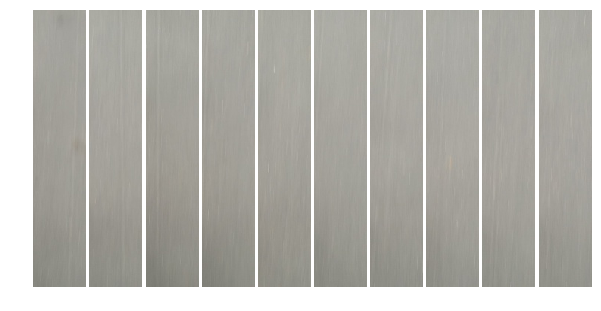

In [10]:
# Plot Beispiel Bilder
fig = plt.figure(1, figsize=(10,10))
# Anzahl der Bilder >= 10
imageToShow = 10
# Start Index des ersten Bildes
grid = ImageGrid(fig, 111, nrows_ncols=(int(imageToShow/10), 10), axes_pad=0.05)
for i, img in enumerate(images[startIndex: startIndex + imageToShow]):
    ax = grid[i]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
plt.savefig("leichteErschütterungReferenzstrecke.png")

In [9]:
accZSum / counter

1.4935777320799042

### Versuch 2

In [30]:
maxVibration = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].max()
maxVibration

26.78108

In [31]:
##### Fuzzy System ####

# Wetebereich 
vibration          = np.arange(0,maxVibration,0.001)
smoothness         = np.arange(0,4           ,1    )
# Fuzzifizierung Zugehörigkeitsfunktionen
vibrationVeryLow   = fuzz.trapmf(vibration, [    0,    0,1.493,3.426])
vibrationLow       = fuzz.trimf (vibration, [1.493,3.426,5.359])
vibrationHigh      = fuzz.trimf (vibration, [3.426,5.359,7.292])
vibrationVeryHigh  = fuzz.trapmf(vibration, [5.359,7.292,maxVibration, maxVibration])
# Zuordnung der Ausgangsgrößen
smoothnessVeryGood = fuzz.trimf (smoothness,[0,0,1]) 
smoothnessGood     = fuzz.trimf (smoothness,[0,1,2]) 
smoothnessBad      = fuzz.trimf (smoothness,[1,2,3]) 
smoothnessVeryBad  = fuzz.trimf (smoothness,[2,3,4]) 

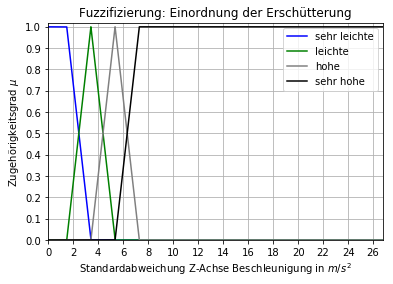

In [32]:
# Plot Fuzzifizierung
plt.plot(vibration, vibrationVeryLow,  c='blue',  label='sehr leichte')
plt.plot(vibration, vibrationLow,      c='green', label='leichte')
plt.plot(vibration, vibrationHigh,     c='gray',  label='hohe')
plt.plot(vibration, vibrationVeryHigh, c='k',     label='sehr hohe')
plt.legend()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Standardabweichung Z-Achse Beschleunigung in $m/s^2$")
plt.title("Fuzzifizierung: Einordnung der Erschütterung")
plt.ylim(0,1.02)
plt.xlim(0,maxVibration)
plt.xticks(np.arange(0, maxVibration, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
#plt.savefig("fuzzifizierungVersuch2.png")

Text(0.5,1,'Gleichmäßigkeit / Fahrqualität')

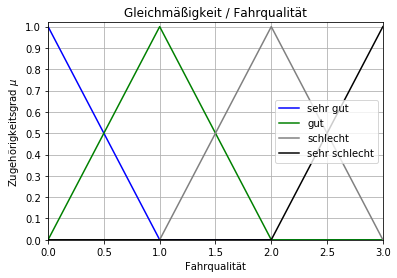

In [33]:
# PLot Gleichmäßigkeit / Fahrqualität
plt.plot(smoothness, smoothnessVeryGood, c='blue',  label='sehr gut')
plt.plot(smoothness, smoothnessGood,     c='green', label='gut')
plt.plot(smoothness, smoothnessBad,      c='gray',  label='schlecht')
plt.plot(smoothness, smoothnessVeryBad,  c='k',     label='sehr schlecht')
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität")
plt.xlim(0,3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.02)
plt.legend(loc=5)
plt.title("Gleichmäßigkeit / Fahrqualität")
#plt.savefig("fahrqualitaetVersuch2.png")

In [50]:
index = 17713
accZValue = 6.3255 #featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[index]
vibrationLevelVeryLow  = fuzz.interp_membership(vibration, vibrationVeryLow,  accZValue)
vibrationLevelLow      = fuzz.interp_membership(vibration, vibrationLow,      accZValue)
vibrationLevelHigh     = fuzz.interp_membership(vibration, vibrationHigh,     accZValue)
vibrationLevelVeryHigh = fuzz.interp_membership(vibration, vibrationVeryHigh, accZValue)

In [51]:
# Berechne Implikation
# Numpy fmin Dokumentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fmin.html
# Regel 1: Wenn die Erschütterung a sehr leicht ist, dann ist die Fahrqualität sehr gut.
# Regel 2: Wenn  die Erschütterung a leicht ist, dann ist die Fahrqualität gut.
# Regel 3: Wenn die Erschütterung a hoch ist, dann ist die Fahrqualität schlecht.
# Regel 4: Wenn die Erschütterung a sehr hoch ist, dann ist die Fahrqualität sehr schlecht.
rule1 = np.fmin(vibrationLevelVeryLow,  smoothnessVeryGood) 
rule2 = np.fmin(vibrationLevelLow,      smoothnessGood)
rule3 = np.fmin(vibrationLevelHigh,     smoothnessBad)
rule4 = np.fmin(vibrationLevelVeryHigh, smoothnessVeryBad)
# Numpy Array mit 0, um Zugrhörigkeitsfläche darzustellen
smoothZeros  = np.zeros_like(smoothness)

Text(0.5,1,'Grad der Zugehörigkeit jeder Stufe')

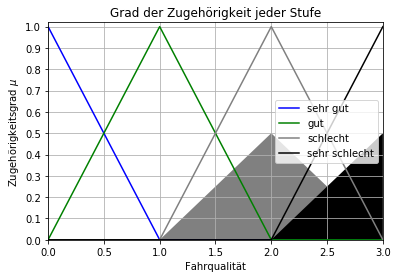

In [52]:
# Plot Aggregation
plt.fill_between(smoothness, smoothZeros, rule1, facecolor='b')
plt.plot(smoothness, smoothnessVeryGood, c='b', label="sehr gut")
plt.fill_between(smoothness, smoothZeros, rule2, facecolor='g')
plt.plot(smoothness, smoothnessGood, c='g', label="gut")
plt.fill_between(smoothness, smoothZeros, rule3, facecolor='gray')
plt.plot(smoothness, smoothnessBad, c='gray', label="schlecht")
plt.fill_between(smoothness, smoothZeros, rule4, facecolor='k')
plt.plot(smoothness, smoothnessVeryBad, 'k', label="sehr schlecht")
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität")
plt.xlim(0,3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.02)
plt.legend(loc=5)
plt.title("Grad der Zugehörigkeit jeder Stufe")

Text(0.5,1,'Defuzzifizierung: Einordnung der Fahrqualität')

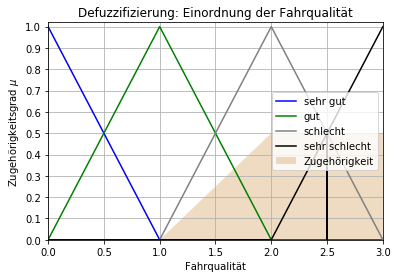

In [57]:
# Akkumalation
accmulation = np.fmax(np.fmax(rule1, rule2),np.fmax(rule3, rule4))
quality = fuzz.defuzz(smoothness, accmulation, 'mom')
qualityActivation = fuzz.interp_membership(smoothness, accmulation, quality) 
# Plot Defuzzifizierung und Akkumalation
plt.plot(smoothness, smoothnessVeryGood, 'b', label="sehr gut" )
plt.plot(smoothness, smoothnessGood, 'g', label="gut")
plt.plot(smoothness, smoothnessBad, c='gray', label="schlecht")
plt.plot(smoothness, smoothnessVeryBad, 'k', label="sehr schlecht")
plt.fill_between(smoothness, smoothZeros, accmulation, facecolor='burlywood', alpha=0.5, label="Zugehörigkeit")
plt.plot([quality, quality], [0, qualityActivation], 'k', linewidth=2)
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität")
plt.xlim(0,3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.02)
plt.legend(loc=5)
plt.title("Defuzzifizierung: Einordnung der Fahrqualität")
#plt.savefig("defuzzifizierungValue3_Versuch2.png")

In [58]:
quality

2.5

In [59]:
round(2.5)

2

<b>Labeln der Daten

In [60]:
featuresDf["Klasse"] = 0
maxIndex = featuresDf.shape[0]
i = 0
classLabels = []
label = 0
while i < maxIndex:
    accZValue = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    vibrationLevelVeryLow  = fuzz.interp_membership(vibration, vibrationVeryLow,  accZValue)
    vibrationLevelLow      = fuzz.interp_membership(vibration, vibrationLow,      accZValue)
    vibrationLevelHigh     = fuzz.interp_membership(vibration, vibrationHigh,     accZValue)
    vibrationLevelVeryHigh = fuzz.interp_membership(vibration, vibrationVeryHigh, accZValue)
    rule1 = np.fmin(vibrationLevelVeryLow,  smoothnessVeryGood)
    rule2 = np.fmin(vibrationLevelLow,      smoothnessGood)
    rule3 = np.fmin(vibrationLevelHigh,     smoothnessBad)
    rule4 = np.fmin(vibrationLevelVeryHigh, smoothnessVeryBad)
    accmulation = np.fmax(np.fmax(rule1, rule2),np.fmax(rule3, rule4))
    label = fuzz.defuzz(smoothness, accmulation, 'mom')    
    classLabels.append(int(label))
    i = i + 1
featuresDf["Klasse"] = classLabels

(0, 3)

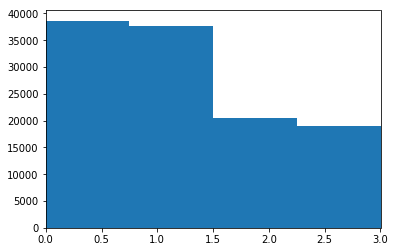

In [75]:
plt.hist(featuresDf['Klasse'], 4)
plt.xlim(0,3)

C:\Users\user\AppData\Local\conda\conda\envs\bicycle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


([<matplotlib.axis.XTick at 0x29f142e3fd0>,
 <a list of 4 Text xticklabel objects>)

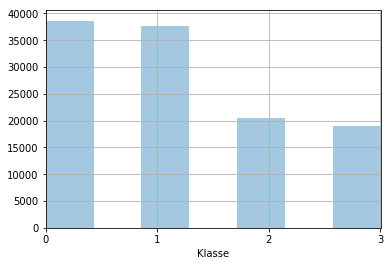

In [65]:
sns.distplot(featuresDf['Klasse'], bins=7, kde=False)
plt.grid()
plt.xlim(0,3)
plt.xticks(np.arange(0, 4, 1))

In [61]:
featuresDf['Klasse']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        1
23        2
24        1
25        0
26        1
27        0
28        0
29        0
         ..
115760    3
115761    3
115762    3
115763    3
115764    3
115765    3
115766    3
115767    2
115768    2
115769    3
115770    3
115771    3
115772    2
115773    3
115774    2
115775    2
115776    3
115777    3
115778    3
115779    2
115780    3
115781    3
115782    3
115783    3
115784    3
115785    1
115786    1
115787    2
115788    0
115789    0
Name: Klasse, Length: 115790, dtype: int64

In [63]:
featuresDf.set_index('Zeitstempel in Unixzeit', inplace=True)
featuresDf.to_csv('../daten/merkmale_datensatz_37_bis_42//merkmaleMitLabeln.csv')

In [64]:
featuresDf

,Anzahl der Messwerte,Belichtungszeit in ns,Breitengrad,Erster Zeitstempel der Teilliste in ns seit Start der JVM,Genauigkeit der Geschwindigkeit speedAccuracyMetersPerSecond,Geschwindigkeit in km/h,Laengengrad,Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM,Lokations Zeitstempel in Unixzeit,Mittelwert Nick in rad,...,Start des Zeitfensters in ns seit Start der JVM,Unnamed: 0,Varianz Nick in rad,Varianz Y-Achse Beschleunigung in m/s^2,Varianz Z-Achse Beschleunigung in m/s^2,Y-Achse Beschleunigungswerte in m/s^2,Z-Achse Beschleunigungswerte in m/s^2,Zeitstempel Messwertdaten anfordern in Unixzeit,Zeitstempel der Messwerte in ns,Klasse
Zeitstempel in Unixzeit,,,,,,,,,,,,,,,,,,,,,
1527868006325,68,10001839,53.613600,22031252922339,NaN,6.552001,10.137851,22031988517781,NaN,-0.037472,...,22031427921319,NaN,0.01506,1.20282,0.72319,0.32101 -1.28695 -2.33848 -2.18083 -1.25551 -0...,0.20745 0.58893 0.45347 0.1461 0.24063 -0.1429...,1527868006521,904443 8903435 16886332 24881885 32885042 4088...,0
1527868007062,57,10001839,53.613610,22031340872852,NaN,7.668000,10.137870,22032668148100,NaN,0.030844,...,22032202822791,NaN,0.02706,2.12653,2.27408,-0.68937 -0.3072 0.22672 -0.23486 -0.50454 0.8...,0.13393 0.1724 -0.1907 -0.76339 -0.43661 -0.85...,1527868007198,1573109 9571422 17568122 25562580 33557718 415...,0
1527868007605,58,9505424,53.613610,22032076466629,NaN,7.668000,10.137870,22033211842969,NaN,0.024422,...,22032737578998,NaN,0.00943,0.78667,0.54657,-0.74535 0.17919 -0.96254 -0.7302 -0.46083 0.6...,0.86105 0.5927 -0.32504 -0.97318 -0.14819 -0.3...,1527868007737,2524655 10519220 18512793 26510846 34499369 42...,0
1527868008094,64,9229638,53.613605,22032612176102,NaN,6.876000,10.137904,22033731560658,NaN,0.041330,...,22033211804555,NaN,0.04734,3.60241,4.92172,1.15419 -0.14522 -0.14174 -2.98252 -2.96466 0....,0.28562 -0.34338 -0.34027 1.1919 1.19167 0.484...,1527868008261,38414 8034020 16028740 24026429 32022295 40016...,0
1527868008632,64,10001839,53.613605,22033115896485,NaN,6.876000,10.137904,22034267264975,NaN,0.068209,...,22033746025455,NaN,0.05794,6.33643,4.62006,0.27816 0.28116 -6.46297 -5.15971 -4.25605 0.3...,3.80124 3.7925 7.87461 5.54547 3.35539 2.03004...,1527868008795,1523393 9520041 17517261 25510106 33506024 414...,0
1527868009112,66,10001839,53.613605,22033643612384,NaN,6.660000,10.137905,22034747022836,NaN,0.079105,...,22034205111295,NaN,0.04860,4.53401,1.76422,-5.69407 -4.112 -0.17249 2.23531 1.57374 -3.26...,0.68637 1.00968 1.16052 0.06892 2.22944 2.2449...,1527868009275,6177357 14175776 22176642 30173914 38165561 46...,0
1527868009570,66,10001839,53.613605,22034115348992,NaN,6.660000,10.137905,22035210755505,NaN,-0.032525,...,22034672812295,NaN,0.06760,4.40301,3.98775,-2.12865 -0.46978 -0.47613 -1.55128 -1.55444 0...,1.66988 0.07955 0.07909 0.00195 0.00107 -0.229...,1527868009742,2241237 10240905 18230572 26232324 34230273 42...,0
1527868010037,65,10001839,53.613605,22034579108818,NaN,6.660000,10.137905,22035674508382,NaN,-0.023817,...,22035140500295,NaN,0.02382,1.68021,1.92288,0.30583 2.15774 -1.0275 -2.2737 0.08535 3.5510...,1.69395 -0.79455 0.10499 0.18056 -1.21573 -0.3...,1527868010208,6298074 14294305 22289181 30284839 38272996 46...,0
1527868010484,58,9229638,53.613620,22035050848396,NaN,7.487999,10.137921,22036082286552,NaN,-0.035694,...,22035605061043,NaN,0.03432,2.29379,3.40227,-1.96812 -1.90816 1.7652 0.5535 -0.18171 2.180...,1.62401 2.02127 -0.54524 0.81201 -0.12737 -2.6...,1527868010616,5483641 13478882 21474695 29461760 37457573 45...,0
